# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading


Loading the dataset csv file using pandas library

In [ ]:
df = pd.read_csv('AirQualityUCI.csv', delimiter=';', parse_dates=['Date'])
display(df.head())

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# Data Exploration

Number of rows:  9471
Number of columns:  17

Data Types:
 Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

Statistical Descriptions:
        PT08.S1(CO)     NMHC(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)  \
count  9357.000000  9357.000000    9357.000000  9357.000000   9357.000000   
mean   1048.990061  -159.090093     894.595276   168.616971    794.990168   
std     329.832710   139.789093     342.333252   257.433866    321.993552   
min    -200.000000  -200.000000    -200.000000  -200.000000   -200.000000   
25%     921.000000  -200.000000     711.000000    50.000000    637.000000   
50%    1053.

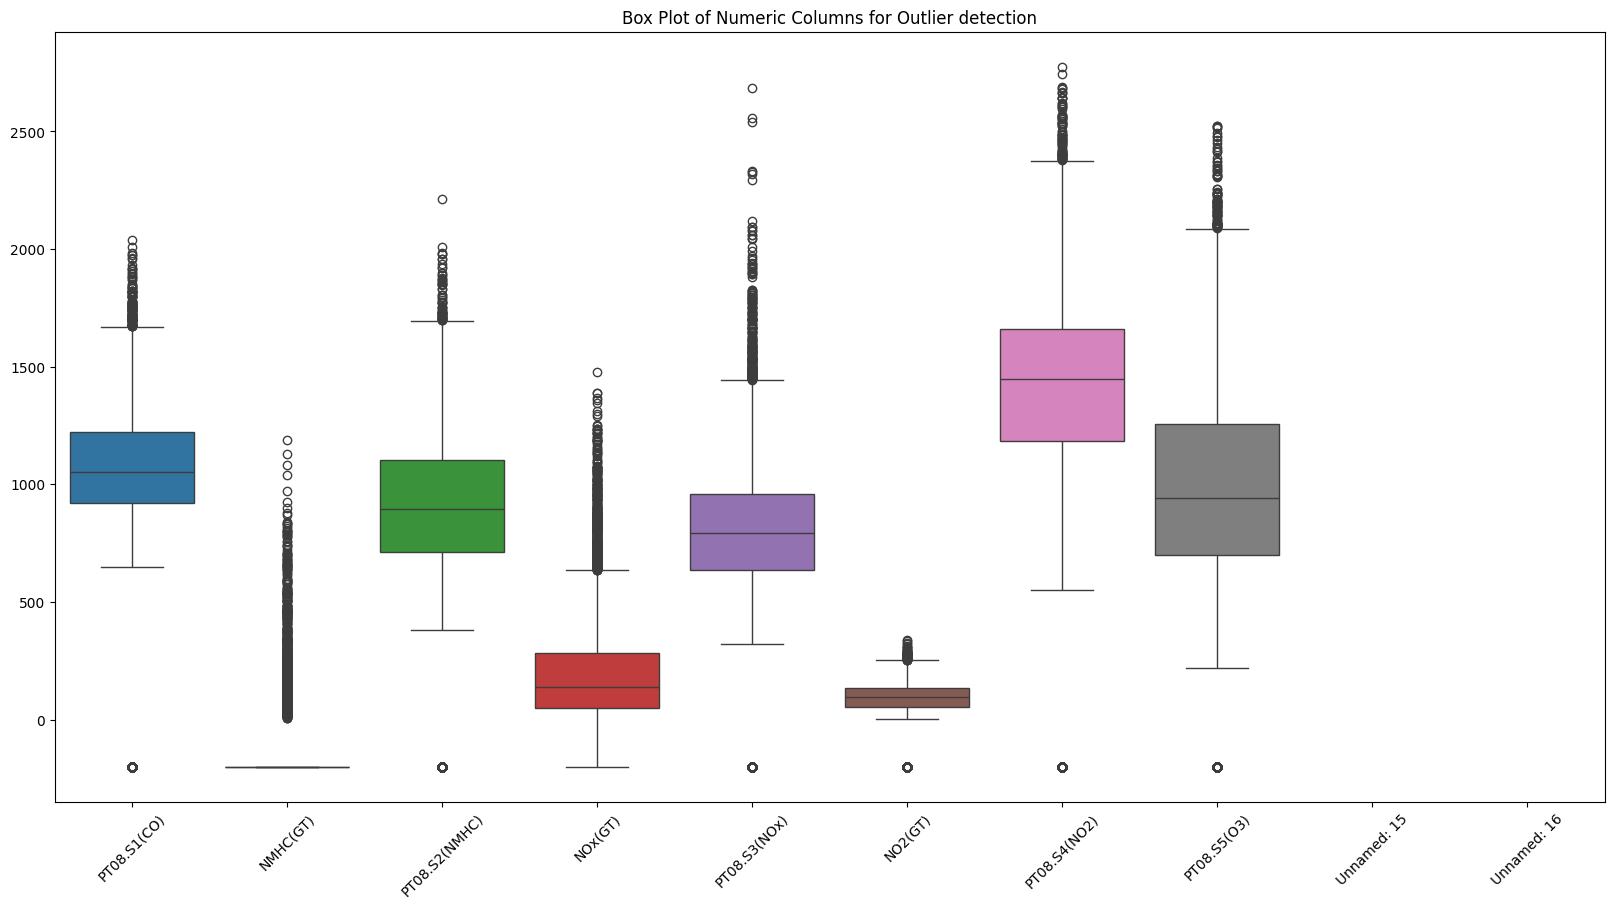

In [ ]:
# Data Shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

# Data Types
print("\nData Types:\n", df.dtypes)

# Statistical Descriptions
print("\nStatistical Descriptions:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())
## Percentage of Missing Values
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Determining Outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Box Plot of Numeric Columns for Outlier detection')
plt.show()

## Correlation Matrix


Non-numeric columns before conversion: ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']


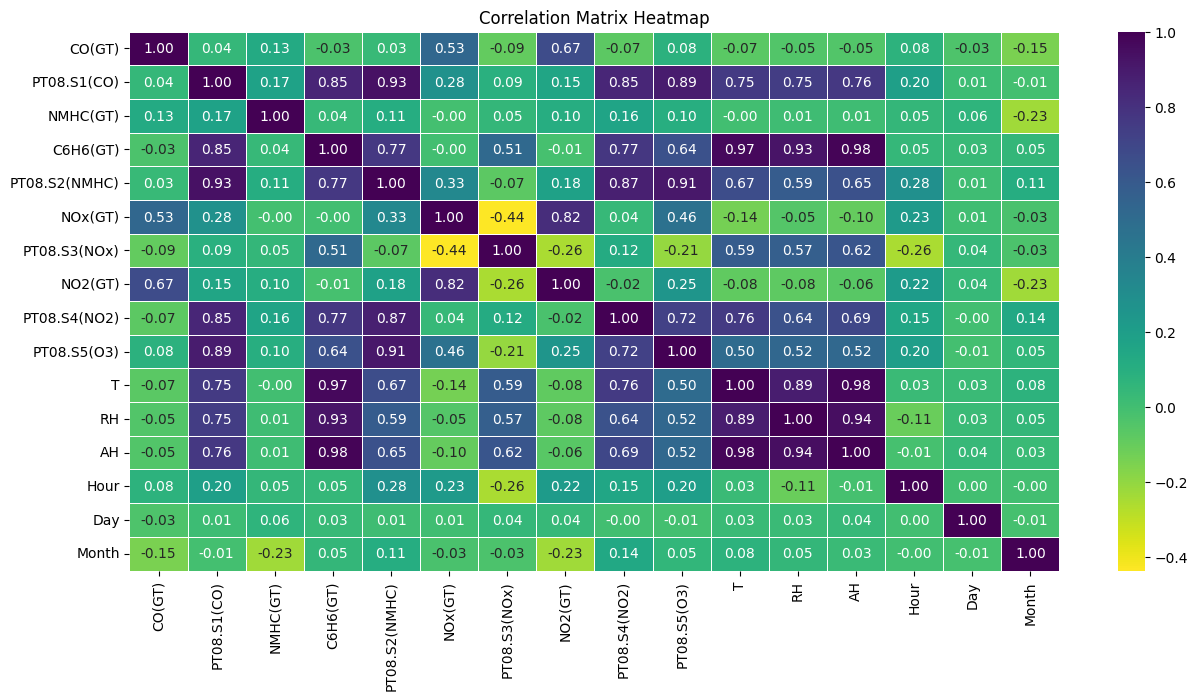

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing columns
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)

# Convert 'Date' and 'Time' to datetime objects
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Extract hour, day, and month
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month

# Drop original 'Date', 'Time', and 'DateTime' columns
df = df.drop(['Date', 'Time', 'DateTime'], axis=1)

# Detection and Handling of errors of all the numeric columns
non_numeric_columns = []
for column in df.columns:
    if df[column].dtype == object:
        non_numeric_columns.append(column)
        try:
            # Converting the columns to numeric, replacing commas with periods
            df[column] = pd.to_numeric(df[column].str.replace(',', '.'), errors='raise')
        except ValueError:
            # Raising warning if conversion fails
            print(f"Warning: Column '{column}' could not be converted to numeric.")
print("\nNon-numeric columns before conversion:", non_numeric_columns)

# # Correlation Matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
# print("\nCorrelation Matrix:\n")
# print(correlation_matrix)

# Correlation Matrix heatmap for visualization
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r', fmt='.2f', linewidth=0.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Distribution of Target Variable

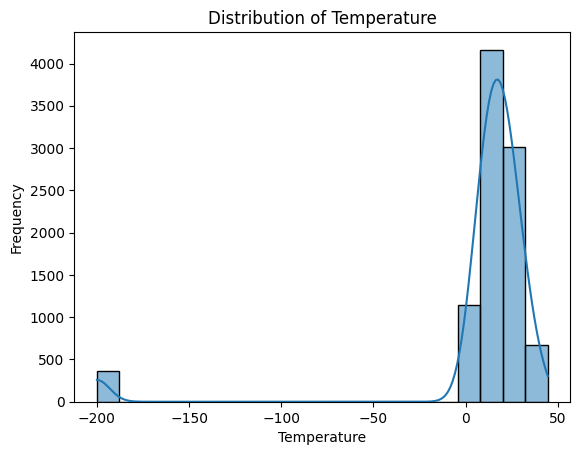

In [ ]:
# Plotting the Distribution of Temperature
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='T', bins=20, kde=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")
plt.show()

## Data Cleaning

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# Replacing the missing values in numeric data with the mean
numerical_features = df.select_dtypes(include=['number']).columns
for column in numerical_features:
    df[column].fillna(df[column].mean(), inplace=True)

# Replacing the missing values in non - numeric data with the mode
# categorical_features = df.select_dtypes(include=['object']).columns
# for column in categorical_features:
#     df[column].fillna(df[column].mode()[0], inplace=True)

# Checking for missing values
missing_values = df.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values)

# Removing Duplicate rows
df.drop_duplicates(inplace=True)


Missing Values After Imputation:
 CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
Day              0
Month            0
dtype: int64


## Handling Outliers

In [ ]:
# Outliers handling using IQR (Inter-Quartile Range) method
for column in numerical_features:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Observing Filtered Data
print(df.head)
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

<bound method NDFrame.head of       CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
184      4.5       1617.0    -200.0      21.3         1333.0    349.0   
185      2.8       1473.0    -200.0      14.3         1127.0    224.0   
186      2.2       1379.0    -200.0      12.5         1068.0    171.0   
187      2.2       1385.0    -200.0      12.2         1056.0    149.0   
188      2.3       1379.0    -200.0      13.1         1087.0    137.0   
...      ...          ...       ...       ...            ...      ...   
9352     3.1       1314.0    -200.0      13.5         1101.0    472.0   
9353     2.4       1163.0    -200.0      11.4         1027.0    353.0   
9354     2.4       1142.0    -200.0      12.4         1063.0    293.0   
9355     2.1       1003.0    -200.0       9.5          961.0    235.0   
9356     2.2       1071.0    -200.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  \
184          68

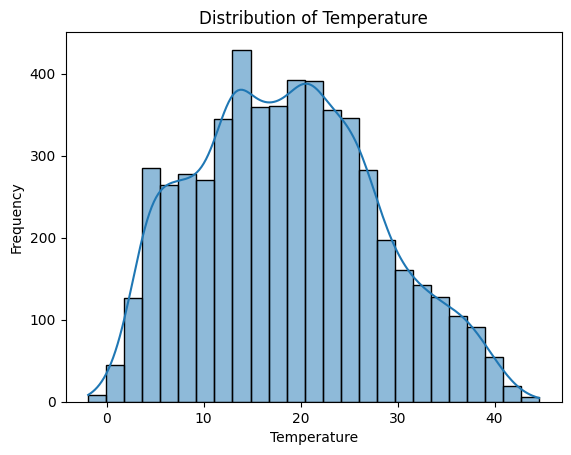

In [ ]:
# Plotting the Distribution of Temperature after handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='T', bins=25, kde=True)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Distribution of Temperature")
plt.show()

# Data Preparation

Finding the Optimum value of correlation threshold

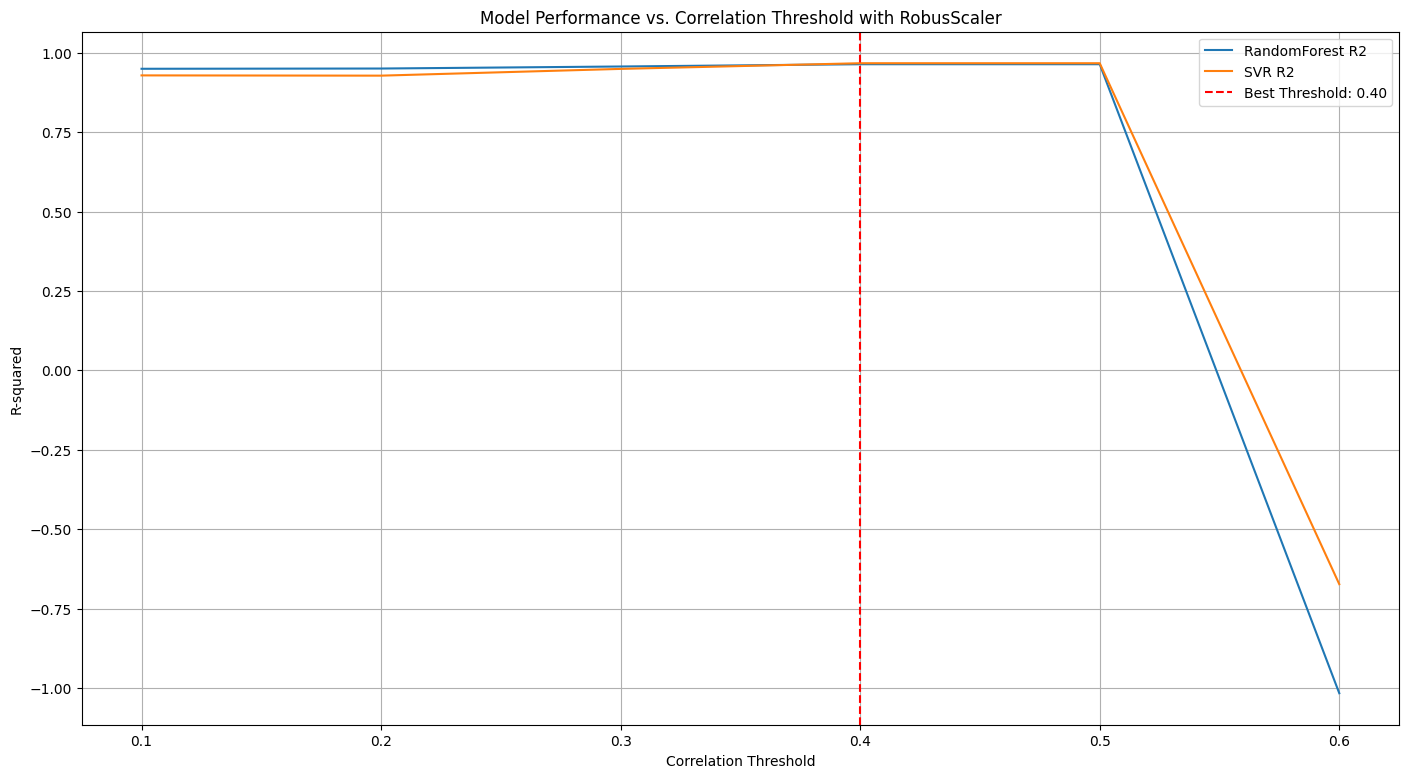

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Making a copy of the original DataFrame
df_cleaned = df.copy()

# Finding the correlation matrix
correlation_matrix = df_cleaned.corr()
target_correlation = correlation_matrix['T'].abs().sort_values(ascending=False)

# Iterating over thresholds
thresholds = np.linspace(0.1, 0.9, 9)

results = []

for threshold in thresholds:
    # Selecting features with strong correlation to target which are greater than threshold
    selected_features = target_correlation[target_correlation >= threshold].index.tolist()
    if 'T' in selected_features:
        selected_features.remove('T')

    if len(selected_features) > 0:
        df_selected = df_cleaned[selected_features + ['T']].copy()

        # Dropping highly correlated features among the selected ones (multicollinearity)
        inter_corr_matrix = df_selected[selected_features].corr().abs()
        upper_triangle = inter_corr_matrix.where(np.triu(np.ones(inter_corr_matrix.shape), k=1).astype(bool))

        to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
        final_features = [f for f in selected_features if f not in to_drop]

        if len(final_features) > 0:
            df_final = df_selected[final_features + ['T']].copy()

            # Replacing missing values with mean
            imputer = SimpleImputer(strategy='mean')
            df_final[final_features] = imputer.fit_transform(df_final[final_features])

            # Scaling features
            scaler = RobustScaler()
            df_final[final_features] = scaler.fit_transform(df_final[final_features])

            # Splitting data
            X = df_final.drop('T', axis=1)
            y = df_final['T']

            # Random forest Application to compare cross validation score
            rf_model = RandomForestRegressor(random_state=42)
            rf_score = np.mean(cross_val_score(rf_model, X, y, cv=5, scoring='r2'))

            # SVR Application
            svr_model = SVR()
            svr_score = np.mean(cross_val_score(svr_model, X, y, cv=5, scoring='r2'))


            results.append([threshold, rf_score, svr_score])

#Taking average of r2 score of both models
results_df = pd.DataFrame(results, columns=['Threshold', 'RandomForest R2', 'SVR R2'])
results_df['Average R2'] = (results_df['RandomForest R2'] + results_df['SVR R2']) / 2

# Finding best threshold
best_threshold = results_df.loc[results_df['Average R2'].idxmax(), 'Threshold']
best_avg_r2 = results_df.loc[results_df['Average R2'].idxmax(), 'Average R2']

# Ploting the results
plt.figure(figsize=(17, 9))
sns.lineplot(x='Threshold', y='RandomForest R2', data=results_df, label='RandomForest R2')
sns.lineplot(x='Threshold', y='SVR R2', data=results_df, label='SVR R2')
plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold: {best_threshold:.2f}')
plt.xlabel('Correlation Threshold')
plt.ylabel('R-squared')
plt.title('Model Performance vs. Correlation Threshold with RobusScaler')
plt.legend()
plt.grid(True)
plt.show()


## Feature Selection based on the optimum Correlation threshold

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

# Computing correlation matrix and keep features with strong correlation to target
correlation_matrix = df_cleaned.corr()
relevant_features = correlation_matrix['T'][abs(correlation_matrix['T']) >= best_threshold].index.tolist()

# Removing 'T' from predictors
if 'T' in relevant_features:
    relevant_features.remove('T')

# Dropping highly inter-correlated features (multicollinearity)
inter_corr_matrix = df_cleaned[relevant_features].corr().abs()
upper_triangle = inter_corr_matrix.where(np.triu(np.ones(inter_corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

final_features = [f for f in relevant_features if f not in to_drop]

# Preparing final DataFrame with selected features and target
df_selected = df_cleaned[final_features + ['T']].copy()


print("Selected Features:", final_features)
print(f"Selection Criteria: Correlation with 'T' >= {best_threshold:.2f} and low inter-feature correlation")

# Replacing missing values
imputer = SimpleImputer(strategy='mean')
df_selected.loc[:, final_features] = imputer.fit_transform(df_selected[final_features])

# Scaling features using RobustScaler
scaler = RobustScaler()
df_selected.loc[:, final_features] = scaler.fit_transform(df_selected[final_features])

# Training-test split
X = df_selected.drop('T', axis=1)
y = df_selected['T']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Displaying nuber of rows and columns
X_train.shape, X_test.shape, y_train.shape, y_test.shape


Selected Features: ['PT08.S4(NO2)', 'RH', 'AH']
Selection Criteria: Correlation with 'T' >= 0.40 and low inter-feature correlation


((3261, 3), (2175, 3), (3261,), (2175,))

# Model Training

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# Creating Random Forest model
rf_model = RandomForestRegressor()
# Creating SVR model
svr_model = SVR()
# Training Random Forest model
rf_model.fit(X_train, y_train)
# Training SVR model
svr_model.fit(X_train, y_train)



SVR()

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error
# Predicting using SVR
y_pred_svr = svr_model.predict(X_test)

# Predicting using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Calculating MAE, MSE, RMSE, and R-squared for SVR
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Calculating MAE, MSE, RMSE, and R-squared for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)



# Printing the metrics
print("\nSVR Model:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)
print("R-squared:", r2_svr)

print("\nRandom Forest Model:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


SVR Model:
MAE: 0.2350796232013669
MSE: 0.3152772655358718
RMSE: 0.5614955614569646
R-squared: 0.9963726626969798

Random Forest Model:
MAE: 0.21713425287356286
MSE: 0.17702948735632096
RMSE: 0.4207487223466293
R-squared: 0.9979632351158252


In [ ]:
import plotly.express as px

# Creating the metrics DataFrame
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'SVR': [mae_svr, mse_svr, rmse_svr, r2_svr],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf]
}
metrics_df = pd.DataFrame(metrics_data)

# Using Plotly for visualization
metrics_melted = pd.melt(metrics_df, id_vars='Metric', var_name='Model', value_name='Score')

# Plotting using Plotly Express
fig = px.bar(
    metrics_melted,
    x='Metric',
    y='Score',
    color='Model',
    barmode='group',
    text='Score',
    title='Model Performance Comparison: SVR vs Random Forest',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Updating the layout for better visuals
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title='Score',
    xaxis_title='Metric',
    title_font_size=18,
    legend_title_text='Model',
    bargap=0.25,
    height=500,
    width=800
)

fig.show()


F-Score and P-Value

In [ ]:
from scipy.stats import f
import numpy as np

# Calculating the residuals(error) for both the models
residuals_svr = y_test - y_pred_svr
residuals_rf = y_test - y_pred_rf

# Calculating residuals for the null model (predicting using the mean value)
y_mean = np.mean(y_test)
residuals_null = y_test - y_mean

# Calculating the F-statistic and p-value for the SVR vs. null model
f_statistic_svr = np.var(residuals_null, ddof=1) / np.var(residuals_svr, ddof=1)
p_value_svr = f.sf(f_statistic_svr, len(residuals_null) - 1, len(residuals_svr) - 1)

# # Setting a lower bound for the p-value for visualization
# p_value_svr = max(p_value_svr, np.finfo(float).eps)

print("\nSVR vs. Null Model:")
print("F-statistic:", f_statistic_svr)
print(f"P-value: {p_value_svr:.3e}")

alpha = 0.05  # Significance level which is 5%  chance of incorrectly rejecting the null hypothesis

if p_value_svr < alpha:
    print("\nFor SVR:")
    print("Rejecting the null hypothesis.")
    print("The statistics are significant, indicating a significant improvement over the null model.")


# Calculating F-statistic and p-value for the Random Forest vs. null model
f_statistic_rf = np.var(residuals_null, ddof=1) / np.var(residuals_rf, ddof=1)
p_value_rf = f.sf(f_statistic_rf, len(residuals_null) - 1, len(residuals_rf) - 1)

# # Setting a lower bound for the p-value
# p_value_rf = max(p_value_rf, np.finfo(float).eps)

print("\nRandom Forest vs. Null Model:")
print("F-statistic:", f_statistic_rf)
print(f"P-value: {p_value_rf:.3e}")

if p_value_rf < alpha:
    print("\nFor Random Forest:")
    print("Rejecting the null hypothesis.")
    print("The statistics are significant, indicating a significant improvement over the null model.")


SVR vs. Null Model:
F-statistic: 277.75159351192076
P-value: 0.000e+00

For SVR:
Rejecting the null hypothesis.
The statistics are significant, indicating a significant improvement over the null model.

Random Forest vs. Null Model:
F-statistic: 491.0770909599638
P-value: 0.000e+00

For Random Forest:
Rejecting the null hypothesis.
The statistics are significant, indicating a significant improvement over the null model.


Visualizing the Performance of both the Models with respect to the Actual values of Target variable

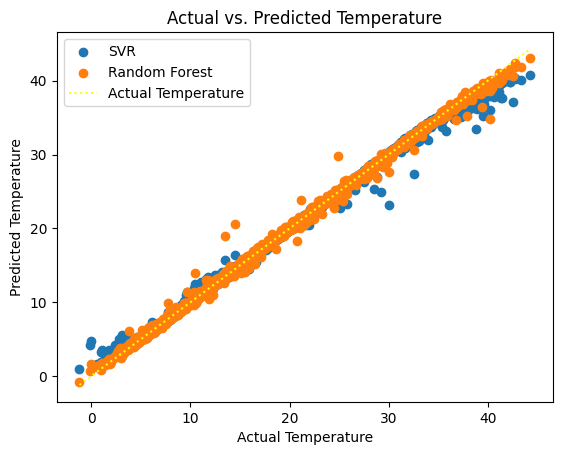

In [ ]:
plt.scatter(y_test, y_pred_svr, label='SVR')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature')
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='yellow', linestyle='dotted', label='Actual Temperature')
plt.legend()
plt.show()

# Model Optimisation

Using GridSearch with Cross Validation tool to optimise the hyperparameters of the models

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'], # type of kernel used
    'C': [0.1, 1, 10], # regularization
    'epsilon': [0.1, 0.2, 0.5] # margin of tolerance for errors
}

# Defining the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300], # number of trees
    'max_depth': [None, 5, 10], # maximum depth of each tree
    'min_samples_split': [2, 5, 10], # minimum number of samples required to split internal nodes
    'min_samples_leaf': [1, 2, 4] # minimum number of samples required to become a leaf node
}

# Creating GridSearchCV objects for SVR and Random Forest
grid_search_svr = GridSearchCV(estimator=SVR(), param_grid=param_grid_svr, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fitting the GridSearchCV objects to the training data
grid_search_svr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Storing and Printing the optimized models and Parameters
svr_optimized = grid_search_svr.best_estimator_
rf_optimized = grid_search_rf.best_estimator_
print("Optimized SVR:")
print("Best Parameters:", grid_search_svr.best_params_)
# print("Best Score (Negative MSE):", grid_search_svr.best_score_)

# Print the best parameters and scores for Random Forest
print("\nOptimized Random Forest:")
print("Best Parameters:", grid_search_rf.best_params_)
# print("Best Score (Negative MSE):", grid_search_rf.best_score_)

Optimized SVR:
Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}

Optimized Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Optimized Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score
# Predicting using optimized SVR model
y_pred_svr = svr_optimized.predict(X_test)

# Predicting using optimized Random Forest model
y_pred_rf = rf_optimized.predict(X_test)

# Calculating MAE, MSE, RMSE, and R-squared for optimized SVR model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Calculating MAE, MSE, RMSE, and R-squared for optimized Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
# Printing the metrics
print("\nSVR Model:")
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("RMSE:", rmse_svr)
print("R-squared:", r2_svr)

print("\nRandom Forest Model:")
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


SVR Model:
MAE: 0.08473844553129907
MSE: 0.0339972654064063
RMSE: 0.18438347378874903
R-squared: 0.9996088536583831

Random Forest Model:
MAE: 0.21487892720306503
MSE: 0.1787729059003834
RMSE: 0.42281545135009363
R-squared: 0.9979431766853231


In [ ]:
import plotly.express as px

# Creating the metrics DataFrame
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R-squared'],
    'SVR': [mae_svr, mse_svr, rmse_svr, r2_svr],
    'Random Forest': [mae_rf, mse_rf, rmse_rf, r2_rf]
}
metrics_df = pd.DataFrame(metrics_data)

# Using Plotly for visualization
metrics_melted = pd.melt(metrics_df, id_vars='Metric', var_name='Model', value_name='Score')

# Plotting using Plotly Express
fig = px.bar(
    metrics_melted,
    x='Metric',
    y='Score',
    color='Model',
    barmode='group',
    text='Score',
    title='Model Performance Comparison after optimization: SVR vs Random Forest',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Updating the layout for better visuals
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    yaxis_title='Score',
    xaxis_title='Metric',
    title_font_size=18,
    legend_title_text='Model',
    bargap=0.25,
    height=500,
    width=800
)

fig.show()


Visualizing the performance of the Optimized model with respect to the actual values of Target Variable

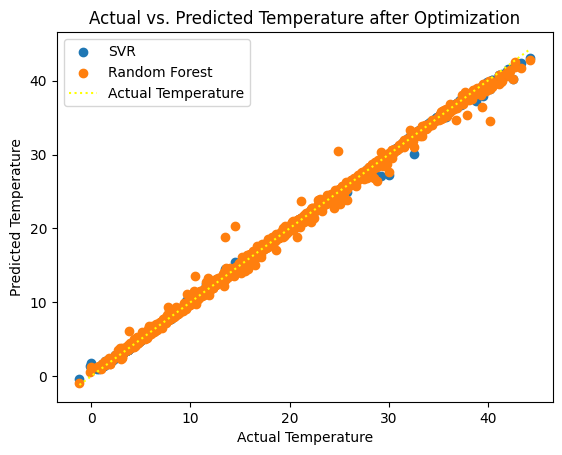

In [ ]:
plt.scatter(y_test, y_pred_svr, label='SVR')
plt.scatter(y_test, y_pred_rf, label='Random Forest')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs. Predicted Temperature after Optimization')

x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='yellow', linestyle='dotted', label='Actual Temperature')

plt.legend()
plt.show()

# Prediction of our optimized model for random test values


In [ ]:
X_new = np.array([[1692,48.9,0.7578]])
y_pred_rf = rf_optimized.predict(X_new)
print("Predicted Y (Random Forest):", y_pred_rf[0])
y_pred_svr = svr_optimized.predict(X_new)
print("Predicted Y (SVR):", y_pred_svr[0])

Predicted Y (Random Forest): 16.571333333333364
Predicted Y (SVR): 20.324472973851467
